In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data.txt', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 241.9+ KB


In [4]:
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [5]:
# Converting to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
# Setting a datetime index to the dataframe
df = df.set_index('timestamp')

In [7]:
df.head()

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820


In [8]:
# Checking NULL values
df.isna().sum()

value    0
dtype: int64

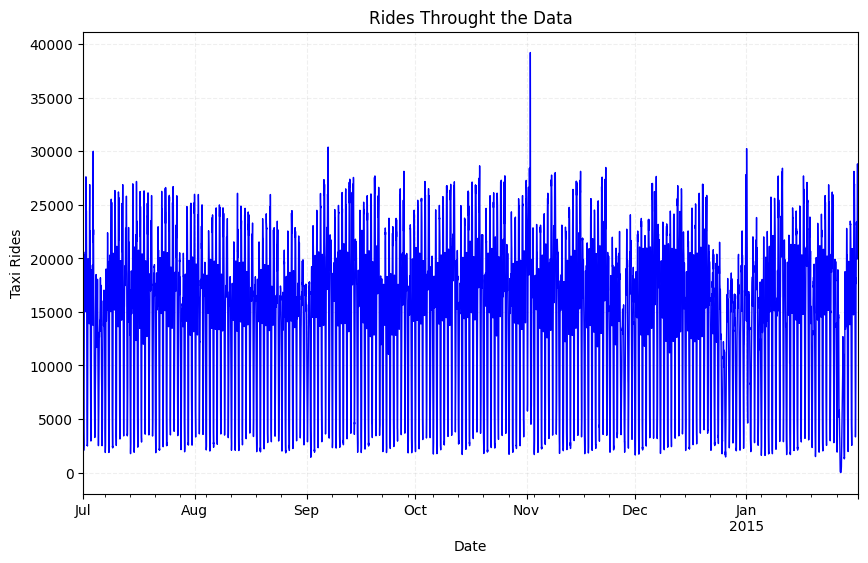

In [9]:
df['value'].plot(figsize=(10, 6), color='blue', linewidth=1)


plt.xlabel('Date')
plt.ylabel('Taxi Rides')
plt.title('Rides Throught the Data')
plt.grid(True, linestyle='--', alpha=0.2)

plt.show()

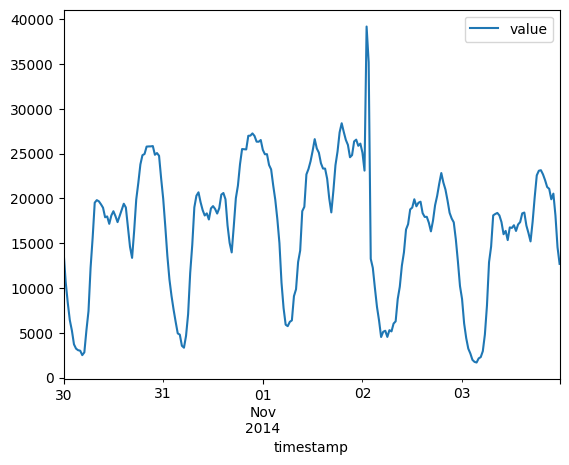

In [10]:
# New York City Marathon
df.loc["2014-10-30":"2014-11-03"].plot()
plt.show()

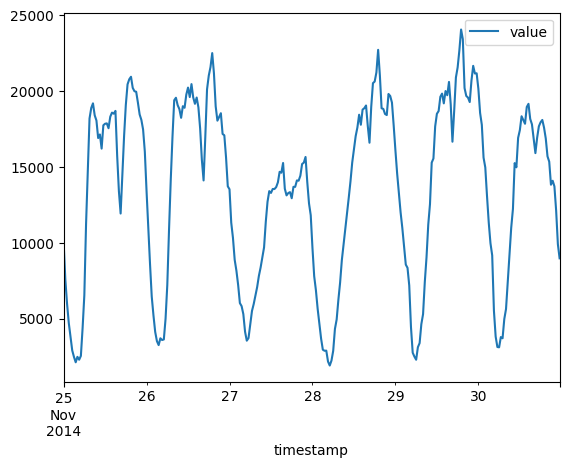

In [11]:
# Thanksgiving
df.loc["2014-11-25":"2014-11-30"].plot()
plt.show()

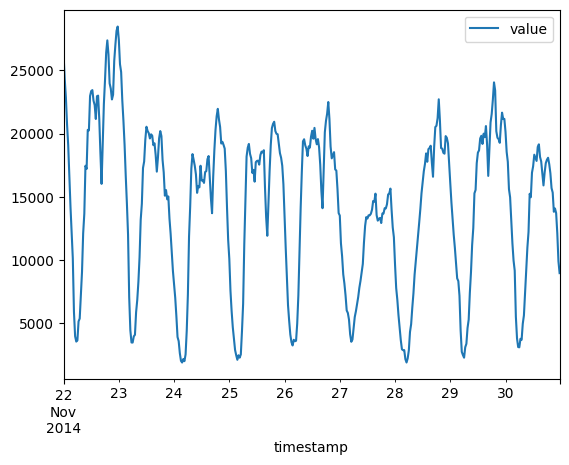

In [12]:
# Snow Storm
df.loc["2014-11-22":"2014-11-30"].plot()
plt.show()



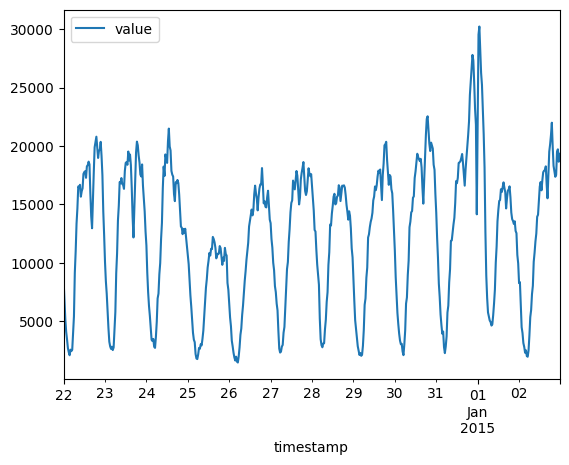

In [13]:
# Chirstmas and New Year
df.loc["2014-12-22":"2015-01-02"].plot()
plt.show()

In [14]:
df['day'] = df.index.day
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['month'] = df.index.month
df.head()

,value,day,hour,weekday,month
timestamp,,,,,
2014-07-01 00:00:00,10844,1,0,1,7
2014-07-01 00:30:00,8127,1,0,1,7
2014-07-01 01:00:00,6210,1,1,1,7
2014-07-01 01:30:00,4656,1,1,1,7
2014-07-01 02:00:00,3820,1,2,1,7


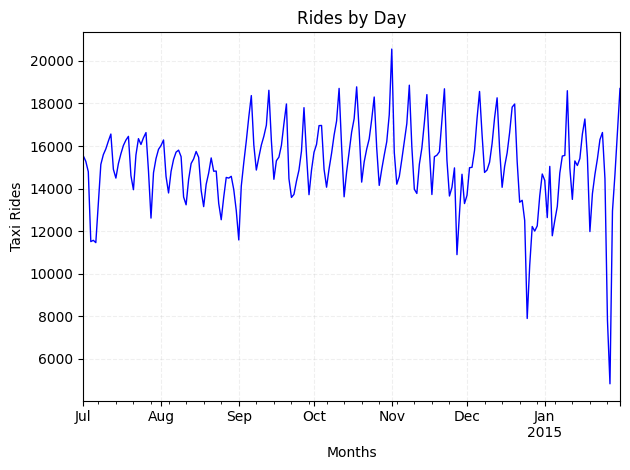

In [15]:
df_day = df['value'].resample('D').mean()
df_day.plot(linewidth = 1, color = 'blue')
plt.xlabel("Months")
plt.ylabel("Taxi Rides")
plt.title("Rides by Day")
plt.tight_layout()
plt.grid(linestyle = '--', alpha = 0.2)
plt.show()


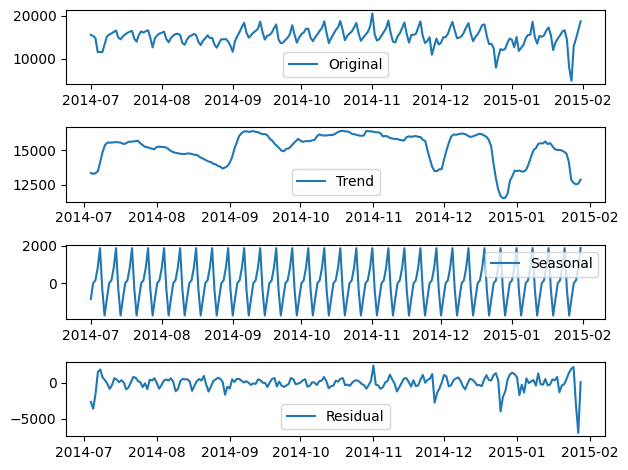

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
df = df.resample('D').mean()

decomposed = seasonal_decompose(df["value"], model = 'additive')


# Access the individual components
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

# Plot the original time series
plt.subplot(411)
plt.plot(df["value"], label='Original')
plt.legend()

# Plot the trend component
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()

# Plot the residual component
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

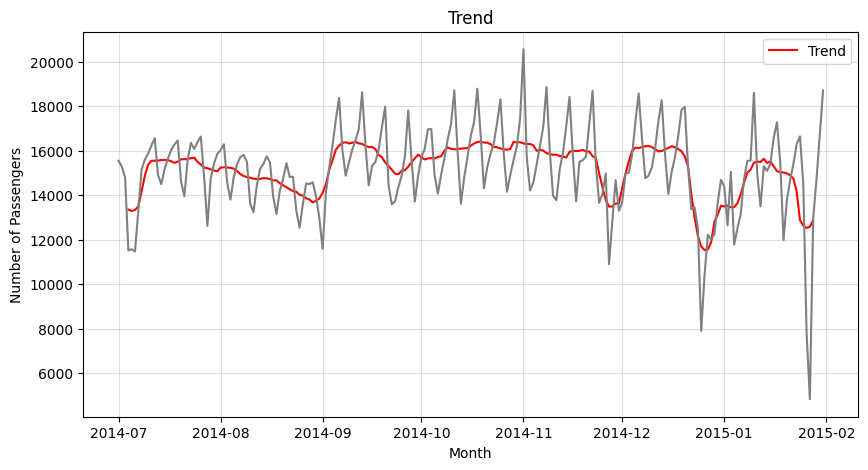

In [19]:
# Plot the seasonally adjusted trend
plt.figure(figsize=(10, 5))
plt.plot(trend, color = 'red', label = 'Trend')
plt.plot(df.index, df['value'], color='gray')
plt.ylabel('Number of Passengers')
plt.xlabel('Month')
plt.title('Trend')
plt.grid(alpha = 0.4)
plt.legend()
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

values = df['value'].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values.reshape(-1,1))

2025-01-01 14:16:44.247892: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735741004.260518  159560 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735741004.265225  159560 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-01 14:16:44.281570: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
train_size = int(len(scaled_values) * 0.8)
train_data = scaled_values[:train_size]
test_data = scaled_values[train_size:]

In [24]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

In [25]:


sequence_length = 10  
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)



In [26]:
X_train.shape

(162, 10, 1)

In [27]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

W0000 00:00:1735741117.160664  159560 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/arthur/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
print('Mean Squared Error:', mse)

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predicted_values = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test)

# Print the predicted and actual values
for i in range(len(predicted_values)):
    print('Predicted:', predicted_values[i], 'Actual:', actual_values[i])

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3959
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2844 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1880 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0940 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0280 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0163 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0214 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0118 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


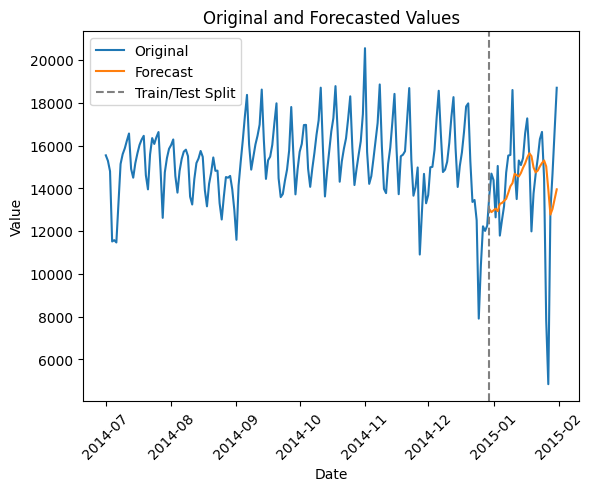

In [30]:
import matplotlib.pyplot as plt


data = df['value']

# Plotting the original values
plt.plot(data, label='Original')

# Plotting the forecasted values

predictions = model.predict(X_train)

plt.plot(data.index[-len(predicted_values):], predicted_values, label='Forecast')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original and Forecasted Values')
plt.axvline(data.index[-len(predicted_values)], color='grey', linestyle='--', label='Train/Test Split')
plt.legend()
plt.xticks(rotation=45)
plt.show()
